In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy import stats

%matplotlib inline 

ipo = pd.read_excel('IPO_Scandinavia.xlsx')
ipo.set_index('Year', inplace = True, )
#sns.distplot(ipo['Offer To 1st Close'].dropna())
ipo.head()

,Month,Day,Listing Date,Registration,Age,Issuer Ticker,Issuer Name,Revenues t-1,EBIT t-1,Currency,...,Offer To Month 1,Market Cap at Offer (M),Industry Sector,Initial Pub Offer (Lead Mgr),Initial Pub Offer (Shares Offered),Offer Size Adj,Closing price 1st day,Adjusted Revenues,Adjusted Ebit,Unnamed: 29
Year,,,,,,,,,,,,,,,,,,,,,
2010,2,5,2010-02-05,2007,3,NORTH NO,North Energy ASA,0.0,-207630000.0,NOK,...,-8.679245,0.0,Energy,"PARETO,PLATOU,SEBENS",12087000,320306000.0,26.80,0.000000,-0.648224,1000000.0
2010,3,2,2010-03-02,1963,47,SJOHB SS,Sportjohan AB,4479000.0,-728000.0,SEK,...,16.666670,0.0,Consumer,Sedermera Fondkommission AB,1150000,1652900.0,2.00,2.709783,-0.440438,NaN
2010,3,24,2010-03-24,1986,24,ARISE SS,Arise AB,29700000.0,-10800000.0,SEK,...,-7.272727,0.0,Energy,ABG Sundal Collier Asa,10730000,486636000.0,53.75,0.061031,-0.022193,NaN
2010,3,26,2010-03-26,1968,42,BAKKA NO,Bakkafrost P/F,596565000.0,192394000.0,DKK,...,22.580645,0.0,Consumer,"NORDIK,NORDEA",2608000,80848000.0,34.40,7.378847,2.379700,NaN
2010,3,29,2010-03-29,2004,6,BRAW SS,Brandworld Sverige AB,83187000.0,18468000.0,SEK,...,72.500000,0.0,Consumer,Unknown,750000,2444660.0,4.90,34.028045,7.554425,NaN


In [45]:
# Extracting and creating a table with IPO return and sectors only
df = pd.DataFrame()
df['ipo'] = ipo['Offer To 1st Close']
df['sector'] = ipo['Industry Sector']
df['sector'].value_counts()
#ipo['Primary Exchange'].value_counts()
#df['ipo'].mean() # 6,3167
#ipo['Primary Exchange'].value_counts()
df['ipo'].describe()

count    455.000000
mean       6.316785
std       32.334439
min      -95.555557
25%       -6.000000
50%        1.052632
75%       14.712171
max      310.714294
Name: ipo, dtype: float64

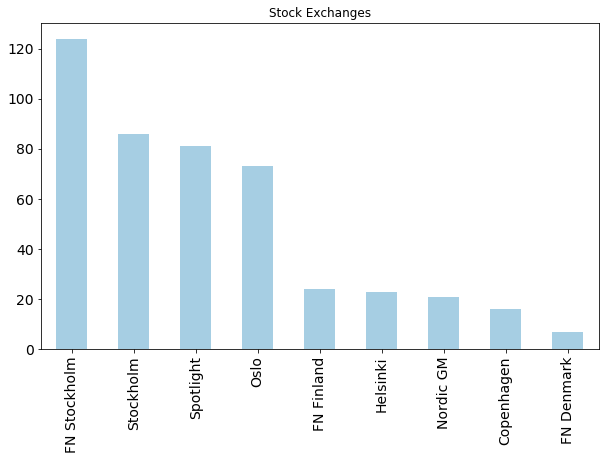

In [3]:
# Exchange count table
table1 = pd.DataFrame()
table1['Primary Exchange'] = ipo['Primary Exchange'].value_counts()

Table1 = table1.plot(kind='bar',stacked=False,figsize=(10,6),
                     colormap='Paired', title='Stock Exchanges',
                    fontsize=14, legend= False)
plt.savefig("Figure X")

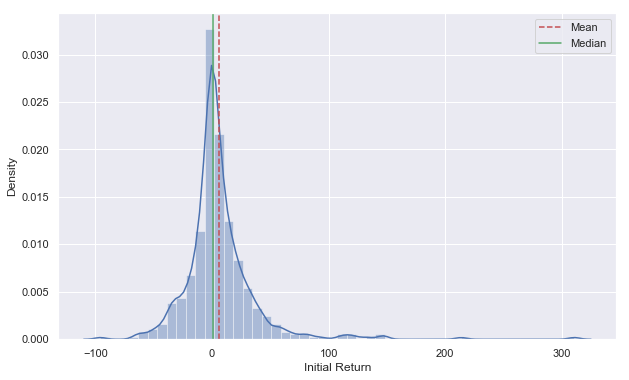

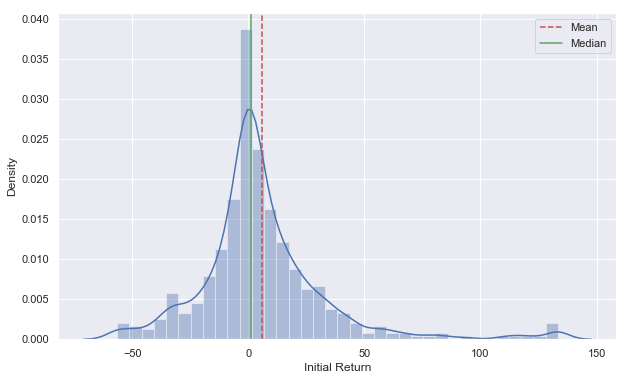

In [29]:
## Winsorizing data - Handling Extreme Values - Removing Outliers ##
# 1% winsorizing fraction 
df['ipo'].mean() # 6.31 NO WINSORIZATION
winzipo = pd.DataFrame(index=ipo.index)
winzipo['0.5% winz'] = scipy.stats.mstats.winsorize(df['ipo'], limits = 0.005)
winzipo['1% winz'] = scipy.stats.mstats.winsorize(df['ipo'], limits = 0.01)
winzipo['2% winz'] = scipy.stats.mstats.winsorize(df['ipo'], limits = 0.02)
winzipo['3% winz'] = scipy.stats.mstats.winsorize(df['ipo'], limits = 0.03)
winzipo['4% winz'] = scipy.stats.mstats.winsorize(df['ipo'], limits = 0.04)
winzipo['10% winz'] = scipy.stats.mstats.winsorize(df['ipo'], limits = 0.1)
#winzipo['5% winz'] = scipy.stats.mstats.winsorize(df['ipo'], limits = 0.05)
winzipo['0.5% winz'].mean() # 5.89%

# Distribution plot before winsorizing ! 
distfig, ax1 = plt.subplots()
distfig.set_size_inches(10, 6)
sns.distplot(df['ipo'])
#sns.distplot(winzipo['1% winz'])
plt.axvline(df['ipo'].mean(), color='r', linestyle='--',label='Mean')
plt.axvline(df['ipo'].median(), color='g', linestyle='-',label='Median')
plt.xlabel('Initial Return')
plt.ylabel('Density')
plt.legend()

#Distribution plot after 1% winsorizing! 
distfig2, ax2 = plt.subplots()
distfig2.set_size_inches(10, 6)
sns.distplot(winzipo['1% winz'])
#sns.distplot(winzipo['1% winz'])
plt.axvline(winzipo['1% winz'].mean(), color='r', linestyle='--',label='Mean')
plt.axvline(winzipo['1% winz'].median(), color='g', linestyle='-',label='Median')
plt.xlabel('Initial Return')
plt.ylabel('Density')
plt.legend()

In [46]:
# Dividing into years
# 2010
From2010 = '2010'
To2010   = '2010'
ipo2010 = df.loc[From2010:To2010,:]
#2011
From2011 = '2011'
To2011   = '2011'
ipo2011 = df.loc[From2011:To2011,:]
#2012
From2012 = '2012'
To2012   = '2012'
ipo2012 = df.loc[From2012:To2012,:]
#2013
From2013 = '2013'
To2013   = '2013'
ipo2013 = df.loc[From2013:To2013,:]
#2014
From2014 = '2014'
To2014   = '2014'
ipo2014 = df.loc[From2014:To2014,:]
#2015
From2015 = '2015'
To2015   = '2015'
ipo2015 = df.loc[From2015:To2015,:]
#2016
From2016 = '2016'
To2016   = '2016'
ipo2016 = df.loc[From2016:To2016,:]
#2017
From2017 = '2017'
To2017   = '2017'
ipo2017 = df.loc[From2017:To2017,:]
#2018
From2018 = '2018'
To2018   = '2018'
ipo2018 = df.loc[From2018:To2018,:]

In [47]:
#grouping by sectors
ipo2010_by_sector = ipo2010.groupby('sector')
ipo2011_by_sector = ipo2011.groupby('sector')
ipo2012_by_sector = ipo2012.groupby('sector')
ipo2013_by_sector = ipo2013.groupby('sector')
ipo2014_by_sector = ipo2014.groupby('sector')
ipo2015_by_sector = ipo2015.groupby('sector')
ipo2016_by_sector = ipo2016.groupby('sector')
ipo2017_by_sector = ipo2017.groupby('sector')
ipo2018_by_sector = ipo2018.groupby('sector')

ipo2010_by_sectormean = pd.DataFrame(ipo2010_by_sector.ipo.mean())
ipo2011_by_sectormean =pd.DataFrame(ipo2011_by_sector.ipo.mean())
ipo2012_by_sectormean =pd.DataFrame(ipo2012_by_sector.ipo.mean())
ipo2013_by_sectormean =pd.DataFrame(ipo2013_by_sector.ipo.mean())
ipo2014_by_sectormean =pd.DataFrame(ipo2014_by_sector.ipo.mean())
ipo2015_by_sectormean =pd.DataFrame(ipo2015_by_sector.ipo.mean())
ipo2016_by_sectormean =pd.DataFrame(ipo2016_by_sector.ipo.mean())
ipo2017_by_sectormean =pd.DataFrame(ipo2017_by_sector.ipo.mean())
ipo2018_by_sectormean =pd.DataFrame(ipo2018_by_sector.ipo.mean())

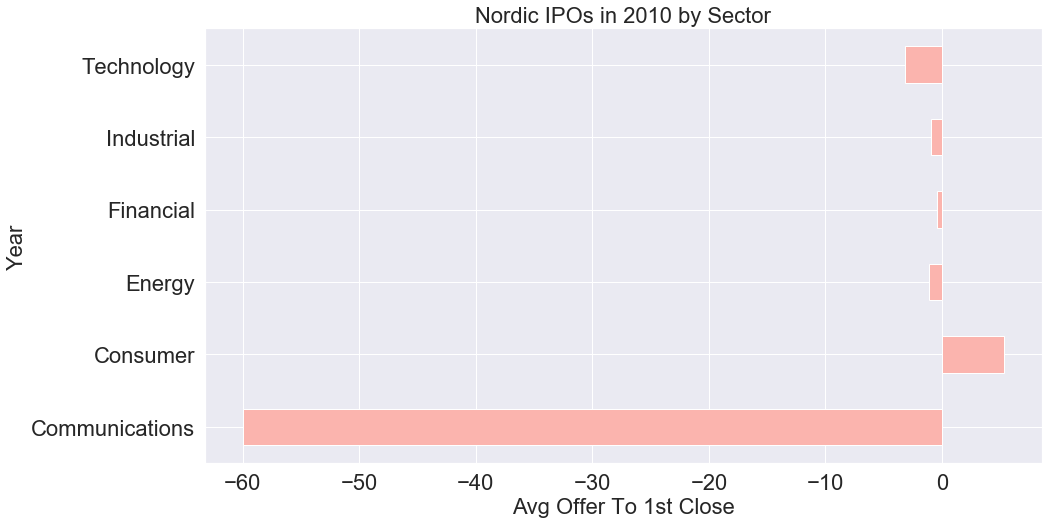

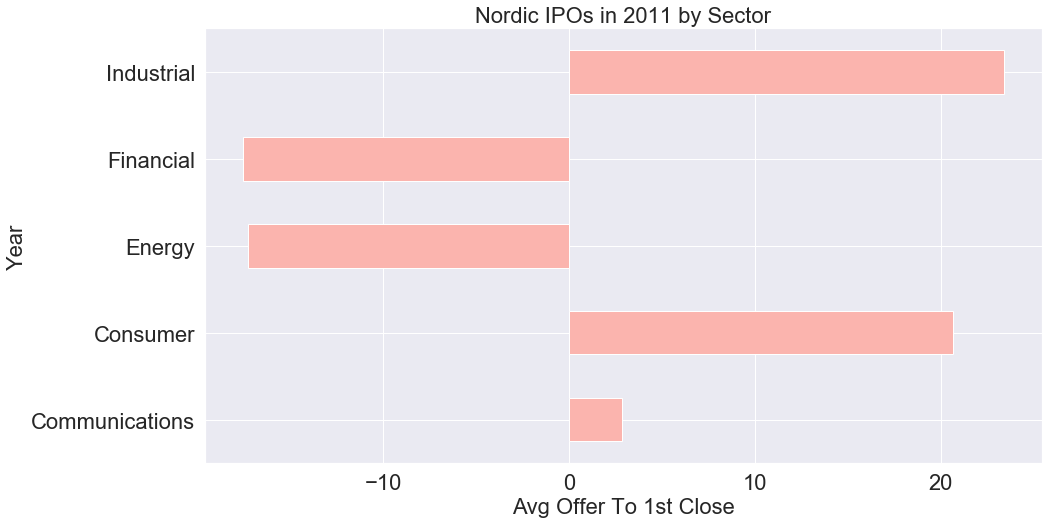

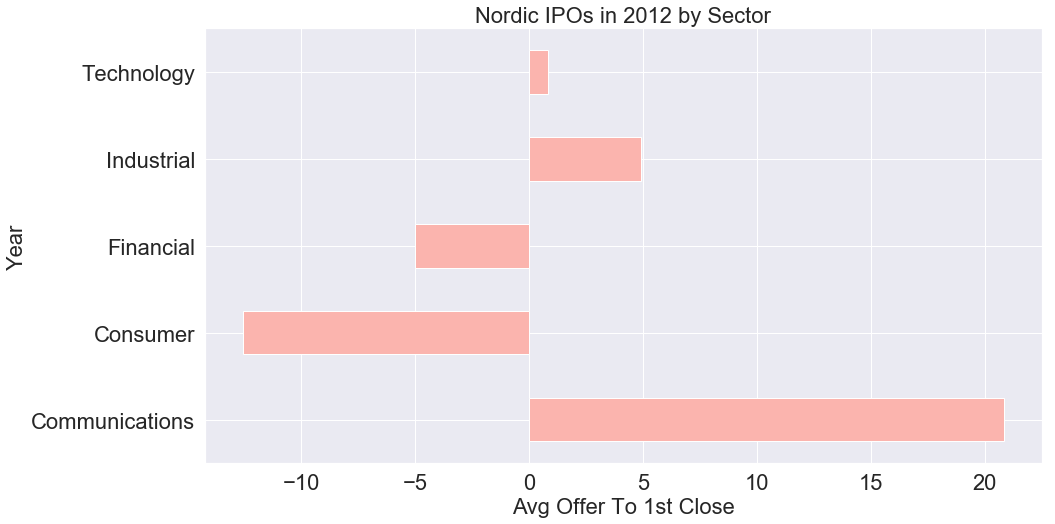

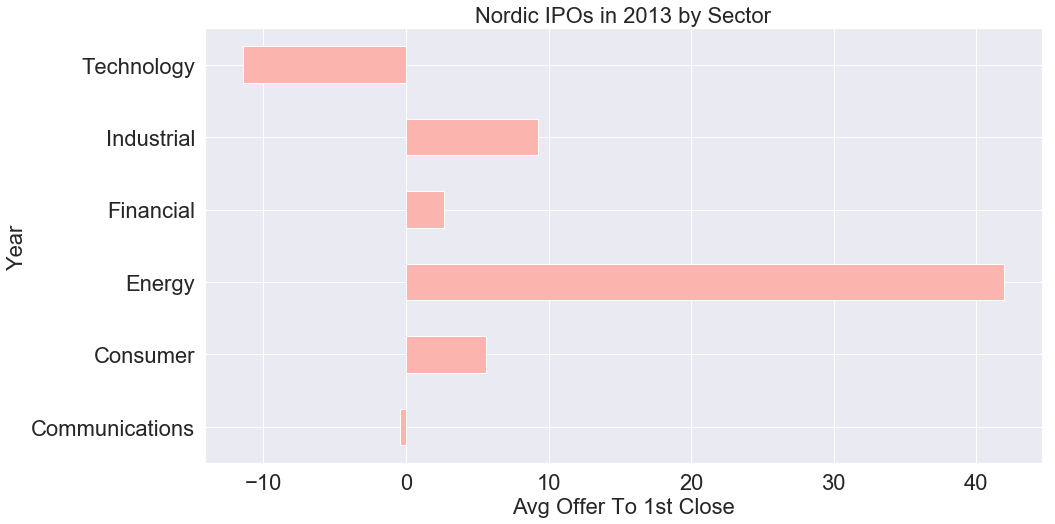

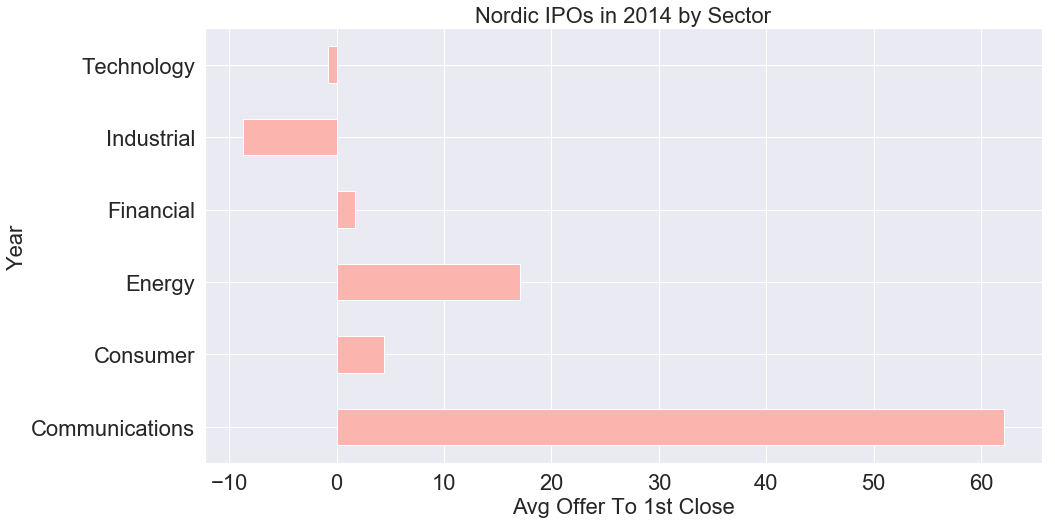

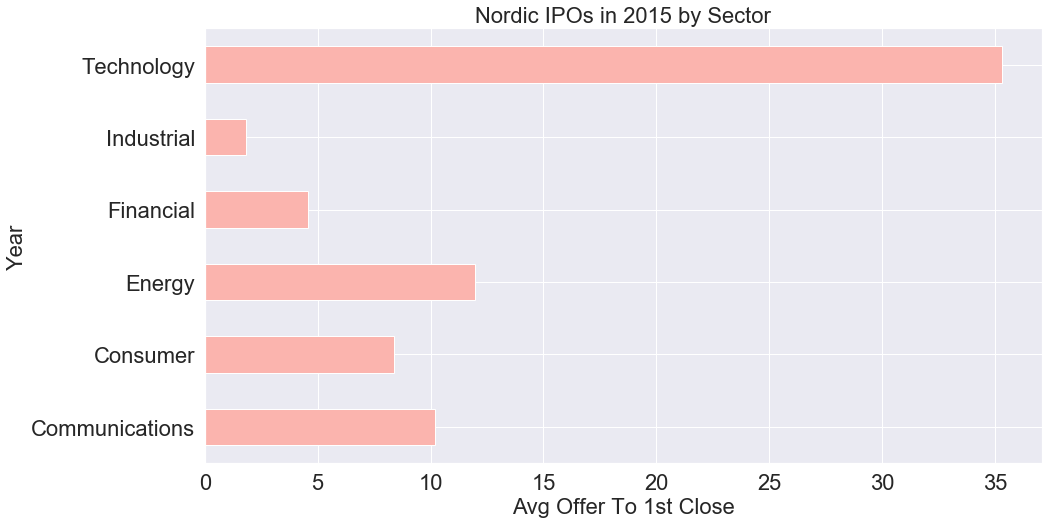

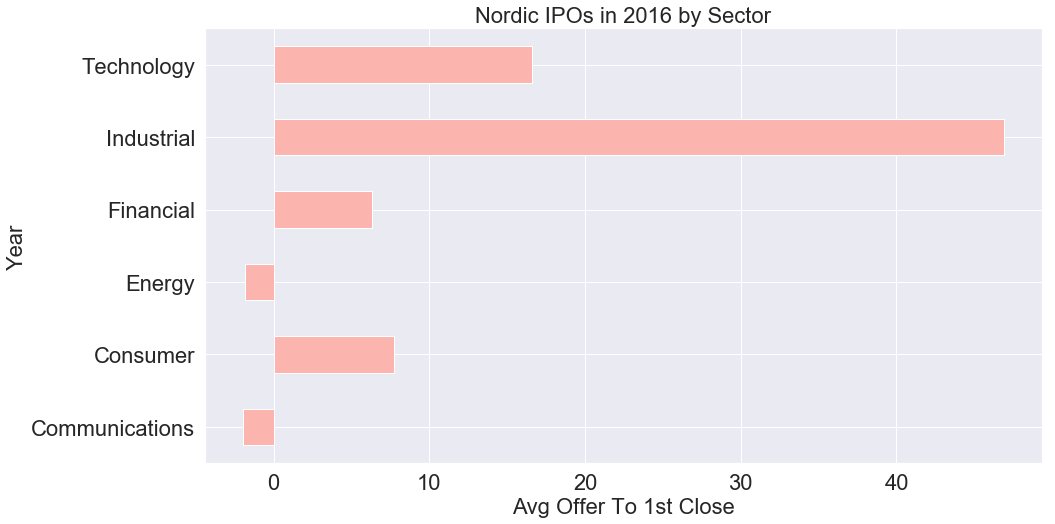

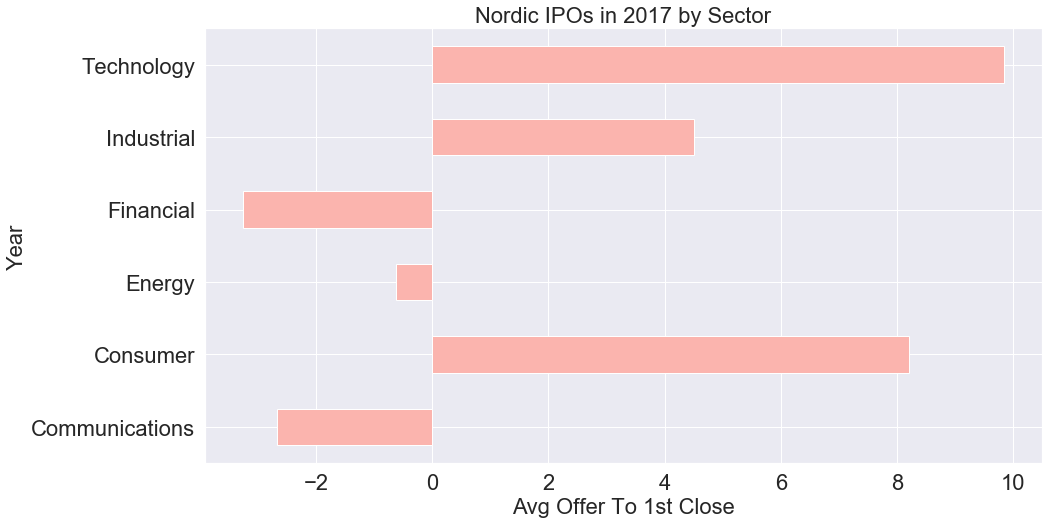

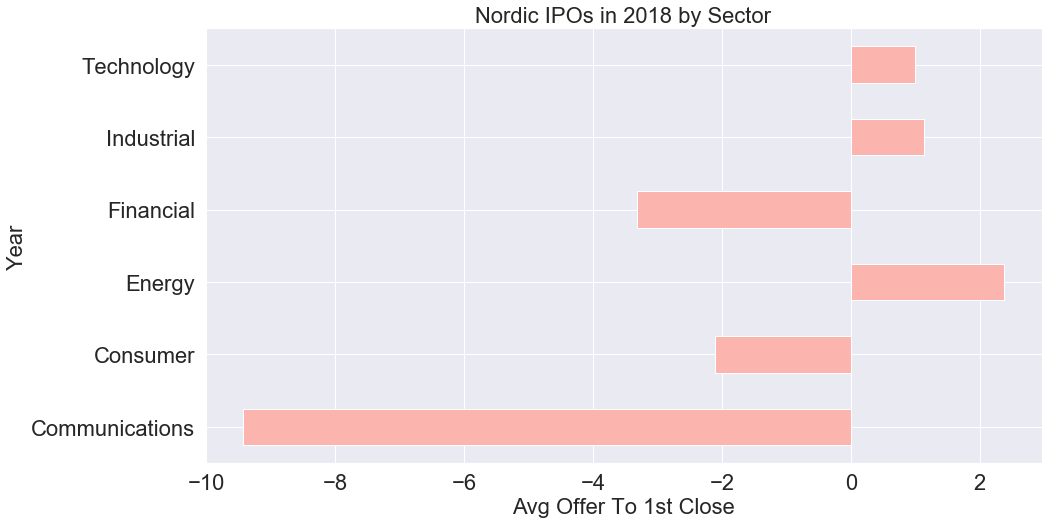

In [48]:
## Plotting ##
# Figure 1#
plt.Figure()
fig1 = ipo2010_by_sectormean.plot(kind='barh', figsize=(15,8), fontsize=22, colormap='Pastel1', legend=False)
sns.set(style="darkgrid")
fig1.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig1.set_ylabel('Year', fontsize=22)
fig1.set_title('Nordic IPOs in 2010 by Sector', fontsize=22)
plt.savefig('Figure 1')

#Figure 2
plt.Figure()
fig2 = ipo2011_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1', legend=False)
fig2.set_title('Nordic IPOs in 2011 by Sector', fontsize=22)
fig2.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig2.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 2")

#Figure 3#
plt.Figure()
fig3 = ipo2012_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1',legend=False)
fig3.set_title('Nordic IPOs in 2012 by Sector', fontsize=22)
fig3.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig3.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 3")

#Figure 4#
plt.Figure()
fig4 = ipo2013_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1',legend=False)
fig4.set_title('Nordic IPOs in 2013 by Sector', fontsize=22)
fig4.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig4.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 4")

plt.Figure()
fig5 = ipo2014_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1',legend=False)
fig5.set_title('Nordic IPOs in 2014 by Sector', fontsize=22)
fig5.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig5.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 5")

plt.Figure()
fig6 = ipo2015_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1',legend=False)
fig6.set_title('Nordic IPOs in 2015 by Sector', fontsize=22)
fig6.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig6.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 6")

plt.Figure()
fig7 = ipo2016_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1',legend=False)
fig7.set_title('Nordic IPOs in 2016 by Sector', fontsize=22)
fig7.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig7.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 7")

plt.Figure()
fig8 = ipo2017_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1',legend=False)
fig8.set_title('Nordic IPOs in 2017 by Sector', fontsize=22)
fig8.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig8.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 8")

plt.Figure()
fig4 = ipo2018_by_sectormean.plot(kind='barh', figsize=(15,8),fontsize=22, colormap='Pastel1',legend=False)
fig4.set_title('Nordic IPOs in 2018 by Sector', fontsize=22)
fig4.set_xlabel('Avg Offer To 1st Close', fontsize=22)
fig4.set_ylabel('Year', fontsize=22)
plt.savefig("Figure 9")


Text(0.5, 1.0, 'Nordic IPOs By Year')

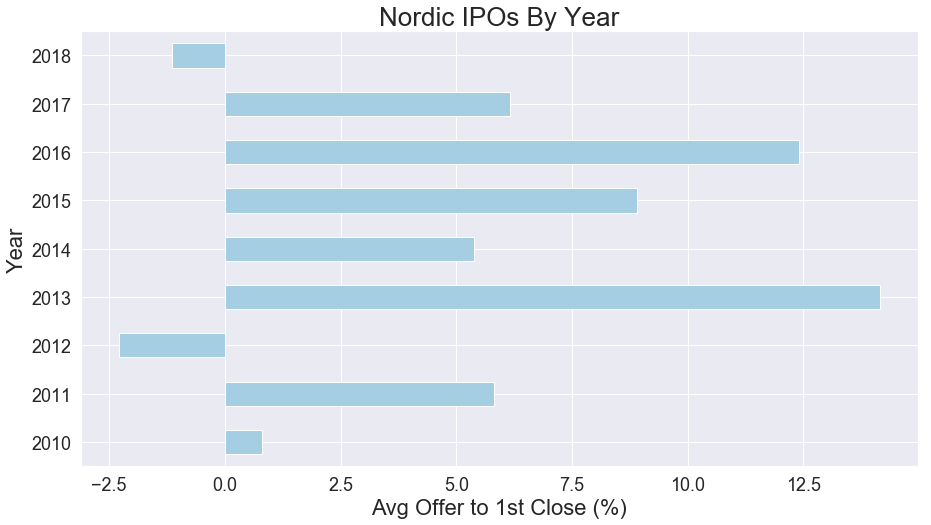

In [49]:
# By year Plotting
df2 = pd.DataFrame()
df2['ipo'] = df['ipo']
df2['sector'] = ipo['Industry Sector']
ipo_by_year = df2.groupby('Year')
ipo_by_year_mean = (ipo_by_year.mean())
figure9 = ipo_by_year_mean.plot(kind='barh', legend=False, colormap='Paired', 
                                figsize=(15,8), fontsize=18, style= 'seaborn')
figure9.set_xlabel("Avg Offer to 1st Close (%)", fontsize=22)
figure9.set_ylabel("Year", fontsize=22)
figure9.set_title('Nordic IPOs By Year', fontsize=26)
#figure9(style="darkgrid")

In [50]:
# Different statistics for returns - Descriptive
# !! Returns before Winsorizing !! 
#initret = df['ipo']
#print(initret.mean())
#print(initret.median())
#print(initret.max())
#print(initret.min())

# !! Returns AFTER Winsorizing with 1% !!
print(winzipo['1% winz'].mean())
print(winzipo['1% winz'].median())
print(winzipo['1% winz'].max())
print(winzipo['1% winz'].min())
print(winzipo['1% winz'].describe())

5.815944935461234
1.052631617
133.3333282
-56.57143021
count    455.000000
mean       5.815945
std       27.970318
min      -56.571430
25%       -6.000000
50%        1.052632
75%       14.712171
max      133.333328
Name: 1% winz, dtype: float64


                      ipo
sector                   
Communications  30.993362
Consumer        28.615286
Energy          44.407855
Financial       18.738961
Industrial      43.370110
Technology      30.612651
                      ipo
sector                   
Communications   1.437878
Consumer         6.124026
Energy           7.727007
Financial       -0.056950
Industrial       9.642528
Technology      10.137950


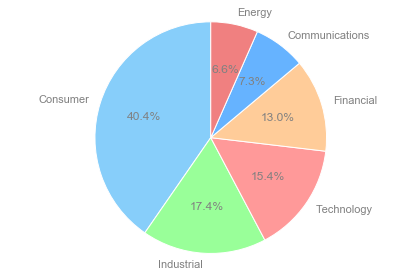

In [51]:
# Underpricing between industries
df_by_sector = df.groupby('sector')
secmean = df_by_sector.mean()
secmed = df_by_sector.median()
secstd = df_by_sector.std()
print(secstd)
print(secmean)
ipo['Industry Sector'].value_counts()

labels = 'Consumer', 'Industrial', 'Technology', 'Financial','Communications','Energy'
sizes = [40.4, 17.4, 15.4, 13, 7.3 ,6.6]
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'seagreen','pink']
#plt.pie(sizes, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%',)
#plt.legend(patches, labels, loc="best")
#plt.axis('equal')
#plt.show()
# Pie chart
#colors
colors = ['lightskyblue','#99ff99','#ff9999','#ffcc99','#66b3ff','lightcoral']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [52]:
# Number of IPOS
mydf = pd.DataFrame()
mydf['IPOs per year'] = df.index.value_counts()

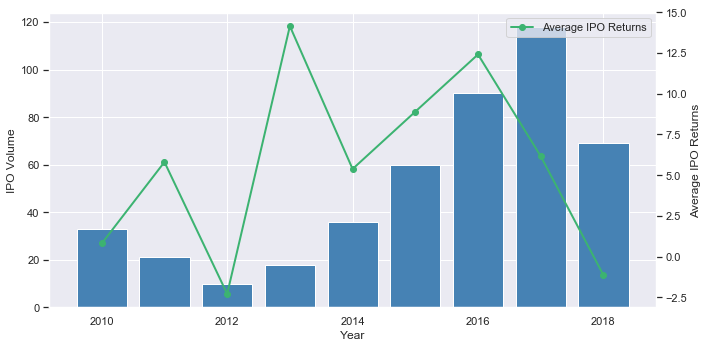

In [53]:
#Number of IPOs during the timeperiod with respective avg returns

t= mydf.index
data1 = mydf['IPOs per year']
data2 = ipo_by_year_mean
fig, ax1 = plt.subplots(figsize=(10,5))

color1 = 'steelblue'
ax1.set_xlabel('Year')
ax1.set_ylabel('IPO Volume')
ax1.bar(t, data1, color=color1)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Average IPO Returns')
ax2.tick_params(axis='y')
ax2.plot(t.sort_values(),data2,color='mediumseagreen',label='Average IPO Returns',linewidth=2,
        marker='o')
plt.legend()
fig.tight_layout()
plt.grid(False)
plt.show()

#scipy.stats.pearsonr(data1,data2['ipo'])

In [54]:
# Avg offer to 1st close by sector
df['sector'] = ipo['Industry Sector']
ipo_by_sector = df.groupby('sector')
ipo_by_sector.mean()
#sectnum = ipo_by_sector['sector'].astype('category').cat.codes
sectnum = df['sector'].astype('category').cat.codes # 5 is tech

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


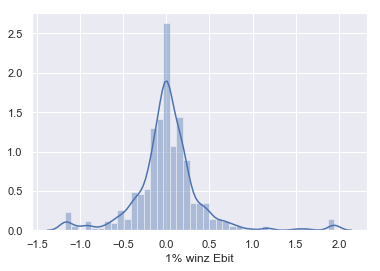

In [55]:
# Log returns and log age
logret = pd.DataFrame()
logret['logret winz'] = np.log(1 + winzipo['1% winz']/100)
logretuw = pd.DataFrame()
logretuw['logret uw'] = np.log(1 + df['ipo']/100)
logage = pd.DataFrame()
logage['logage'] = np.log(1 + ipo['Age'])

# Winsorize de uavhengige variablene (?) 
winzipotest = pd.DataFrame(index=ipo.index)
revt1 = pd.DataFrame()
ebitt1 = pd.DataFrame()
osadj = pd.DataFrame(index=ipo.index)
revt1['log rev'] = np.log(1 + ipo['Revenues t-1'])
revt1['10% winz rev'] = scipy.stats.mstats.winsorize(revt1['log rev'], limits=0.1)
ebitt1['log ebit'] = np.log(1 + ipo['Adjusted Ebit']/100)
ebitt1['2% winz ebit'] = scipy.stats.mstats.winsorize(ebitt1['log ebit'], limits=0.02)
osadj['offer size adjusted'] = np.log(1 + ipo['Offer Size (M)'])
winzipotest['1% winz Revenues'] = scipy.stats.mstats.winsorize(ipo['Adjusted Revenues'], limits = 0.01)
winzipotest['1% winz Ebit'] = scipy.stats.mstats.winsorize(ipo['Adjusted Ebit'], limits = 0.01)
#winzipotest['0.5% winz Offer Size'] = scipy.stats.mstats.winsorize(np.sqrt(ipo['Offer Size Adj']), limits = 0.005)
sns.distplot(winzipotest['1% winz Ebit'])
#testdf['log rev'].plot(kind='hist')

In [56]:
## Regression of raw data !! Nothing is winsorized
technum = df['sector'].astype('category').cat.codes # 5 is tech
delistednum = ipo['Delisted'].astype('category').cat.codes # 1 means delisted
ydata = pd.DataFrame()
ydata = logretuw['logret uw']
xdata = pd.DataFrame()
xdata['Logage'] = logage['logage']
xdata['Adj Revenues'] = ipo['Adjusted Revenues'] 
xdata['Adj Ebit'] = ipo['Adjusted Ebit']
xdata['Adj OS'] = osadj['offer size adjusted']
xdata['Techdummy'] = np.where(technum==5,1,0)
xdata['Non-Tech Dummy'] = np.where(technum==5,0,1)
xdata['Young dummy'] = np.where(ipo['Age']<7, 1,0)
xdata['Old dummy'] = np.where(ipo['Age']>7, 1,0)
xdata['Delisted dummy'] = delistednum

modelA = sm.OLS(ydata,sm.add_constant(xdata.astype(float)),missing='drop').fit(cov_type='HC3')
modelA.summary()
#stats.kstest(modelA.resid, 'norm')
#residuals = modelA.resid
#sns.distplot(residuals)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logret uw   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.486
Date:                Thu, 23 May 2019   Prob (F-statistic):           3.61e-07
Time:                        12:04:08   Log-Likelihood:                -86.952
No. Observations:                 455   AIC:                             191.9
Df Residuals:                     446   BIC:                             229.0
Df Model:                           8                                         
Covariance Type:                  HC3                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0416      0.052      0.805      0.421      -0.060       0.143
Logage             0.0020      0.017      0.121      0.904      -0.031       0.035
Adj Revenues      -0.0008      0.003     -0.224      0.823      -0.008       0.006
Adj Ebit           0.0014      0.013      0.108      0.914      -0.024       0.027
Adj OS             0.0184      0.008      2.379      0.017       0.003       0.034
Techdummy          0.0519      0.029      1.772      0.076      -0.005       0.109
Non-Tech Dummy    -0.0103      0.034     -0.305      0.761      -0.076       0.056
Young dummy       -0.1293      0.068     -1.908      0.056      -0.262       0.004
Old dummy         -0.0992      0.064     -1.560      0.119      -0.224       0.025
Delisted dummy    -0.0481      0.048     -1.012      0.312      -0.141       0.045
==============================================================================
Omnibus:                      293.216   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14437.761
Skew:                          -2.086   Prob(JB):                         0.00
Kurtosis:                      30.279   Cond. No.                     7.52e+16
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The smallest eigenvalue is 3.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

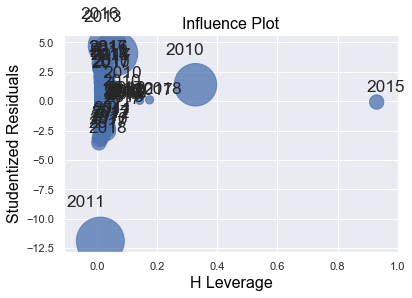

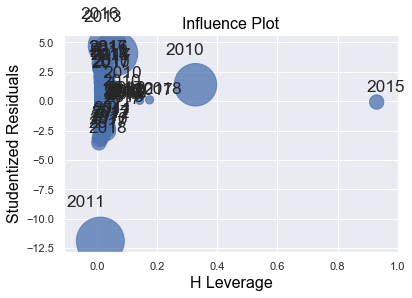

In [57]:
# Outlier test of raw data regression
sm.graphics.influence_plot(modelA,criterion='cooks')

In [71]:
## !! Regression with winsorized data !! 
ydata1 = pd.DataFrame()
ydata1 = logret['logret winz']
xdata1 = pd.DataFrame()
xdata1['Logage'] = logage['logage']
xdata1['Adj Rev'] = revt1['10% winz rev']
xdata1['Adj Ebit1'] = ebitt1['2% winz ebit']
xdata1['Adj OS'] = osadj['offer size adjusted']
xdata1['Techdummy'] = np.where(technum==5,1,0)
xdata1['Non-Tech Dummy'] = np.where(technum==5,0,1)
xdata1['Young dummy'] = np.where(ipo['Age']<7, 1,0)
xdata1['Old dummy'] = np.where(ipo['Age']>7, 1,0)
xdata1['Delisted dummy'] = delistednum

modelA1 = sm.OLS(ydata1,sm.add_constant(xdata1.astype(float)),missing='drop').fit(cov_type='HC0')
modelA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logret winz   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.342
Date:                Thu, 23 May 2019   Prob (F-statistic):           1.79e-08
Time:                        12:06:47   Log-Likelihood:                -5.3119
No. Observations:                 455   AIC:                             28.62
Df Residuals:                     446   BIC:                             65.71
Df Model:                           8                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0425      0.057      0.751      0.453      -0.068       0.153
Logage            -0.0047      0.016     -0.300      0.764      -0.035       0.026
Adj Rev            0.0015      0.004      0.355      0.722      -0.007       0.010
Adj Ebit1          6.3673      4.141      1.538      0.124      -1.749      14.483
Adj OS             0.0108      0.007      1.633      0.102      -0.002       0.024
Techdummy          0.0470      0.033      1.428      0.153      -0.018       0.112
Non-Tech Dummy    -0.0046      0.033     -0.140      0.889      -0.068       0.059
Young dummy       -0.1007      0.055     -1.846      0.065      -0.208       0.006
Old dummy         -0.0795      0.052     -1.533      0.125      -0.181       0.022
Delisted dummy    -0.0578      0.039     -1.497      0.134      -0.133       0.018
==============================================================================
Omnibus:                       40.286   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.601
Skew:                           0.293   Prob(JB):                     1.47e-32
Kurtosis:                       5.718   Cond. No.                     4.27e+17
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The smallest eigenvalue is 8.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

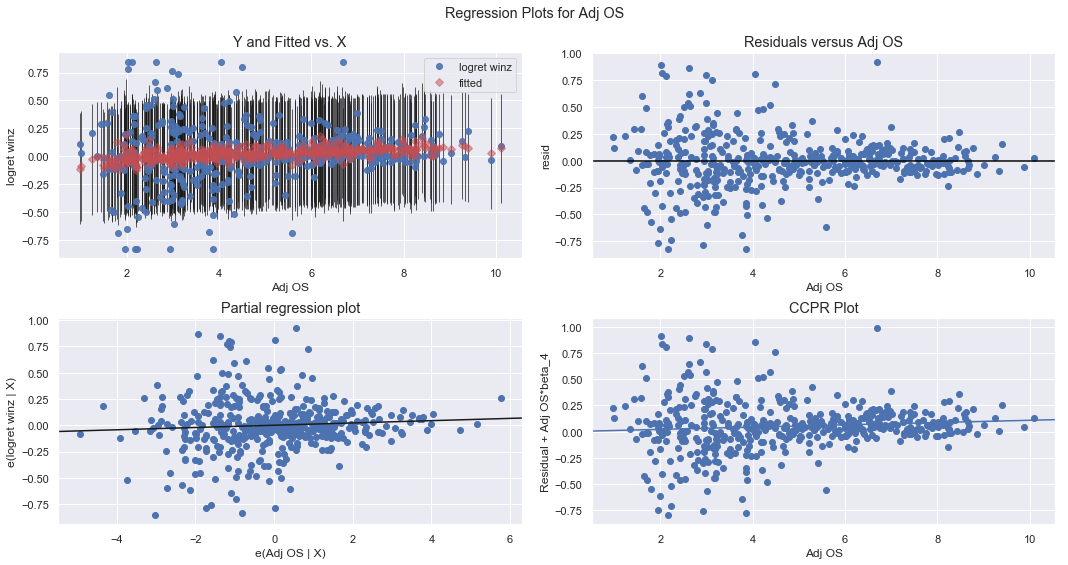

In [72]:
## BELOW IS REGRESSION PLOTS FOR THE WINSORIZED DATASET ## 
# This produces our four regression plots for adjusted offer size

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelA1, "Adj OS", fig=fig)

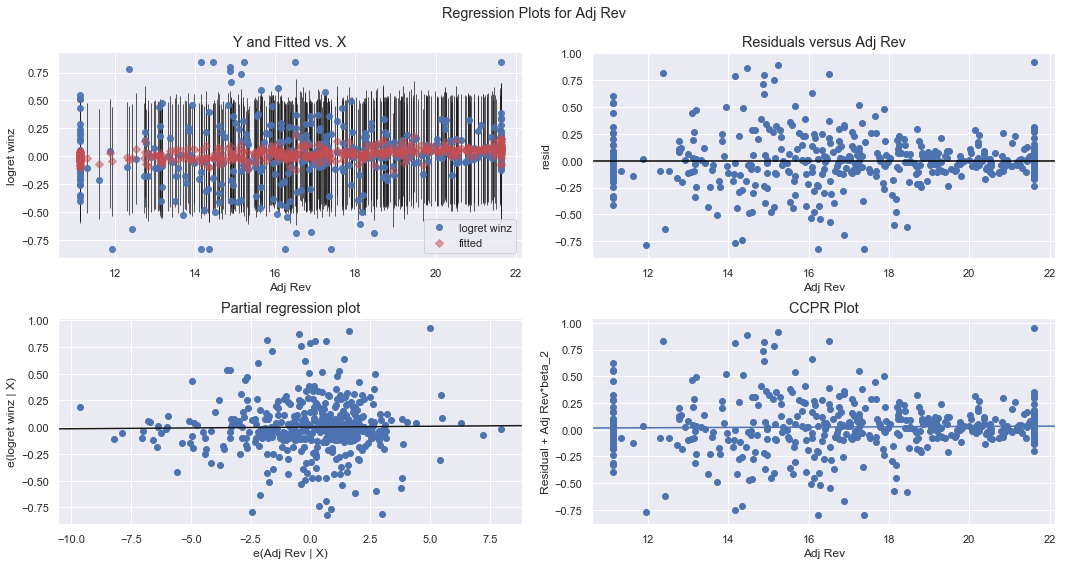

In [73]:
# This produces our four regression plots for Earnings

fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(modelA1, "Adj Rev", fig=fig1)

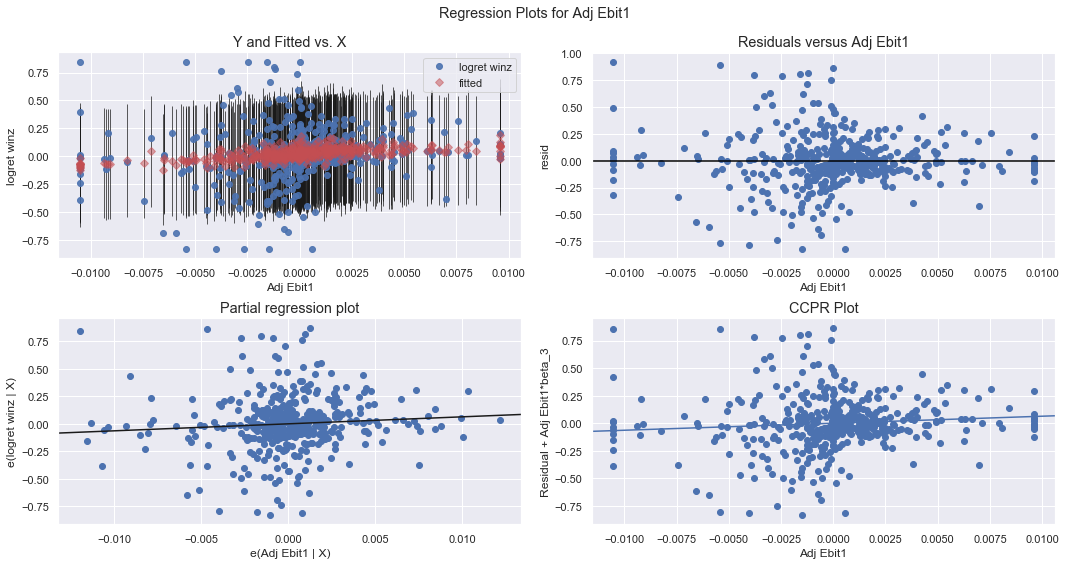

In [74]:
# This produces our four regression plots for Ebit

fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(modelA1, "Adj Ebit1", fig=fig2)

In [ ]:
#sns.distplot(xdata['Adj Earnings'])
#sns.distplot(xdata['Adj Ebit'])
#sns.distplot(xdata['Adj Offer Size'])
#winzipotest = pd.DataFrame(index=ipo.index)
#winzipotest['0.5% winz Earnings'] = scipy.stats.mstats.winsorize(xdata['Adj Rev'], limits = 0.005)
#winzipotest['0.5% winz Ebit'] = scipy.stats.mstats.winsorize(xdata['Adj Ebit'], limits = 0.005)
#winzipotest['0.5% winz Offer Size'] = scipy.stats.mstats.winsorize(xdata['Adj Offer Size'], limits = 0.005)
#sns.distplot(winzipotest['0.5% winz Offer Size'])

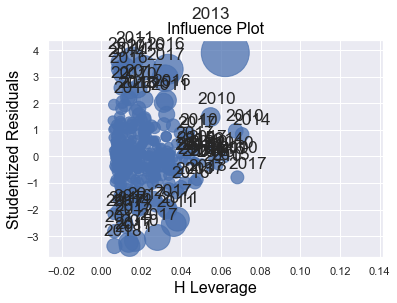

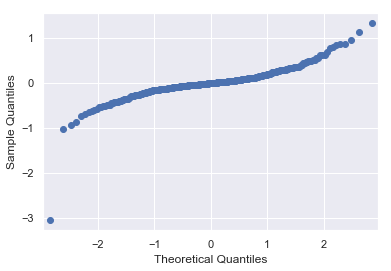

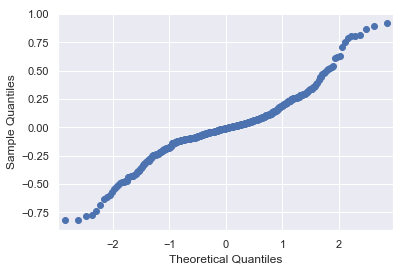

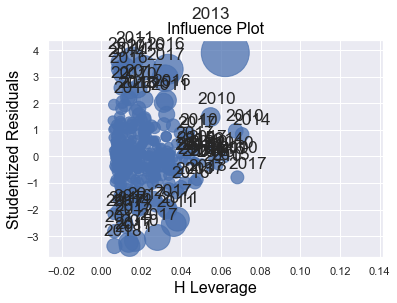

In [80]:
# Sensitivity Analysis #
sm.qqplot(modelA.resid) ## Normal probability plot OF non winsorized dataset 
sm.qqplot(modelA1.resid) ## Normal probability plot OF winsorized dataset ## 
sm.graphics.influence_plot(modelA1,criterion='cooks') # Outlier test of winsorized dataset

In [84]:
## TECH SPECIFIC REGRESSION ## 
## Running regression for only technology firms. i.e. extracting data from the previous DFs where the techdummy is 1, 
# otherwise dont include in regression.

Ydata = pd.DataFrame()
Xdata = pd.DataFrame()
Ydata = logret['logret winz']
Xdata['Adj Rev log Winsorized 1%'] = revt1['10% winz rev'] 
Xdata['Adj Ebit log Winsorized 1%'] = ebitt1['2% winz ebit']
Xdata['Adj Offer Size log'] = osadj['offer size adjusted']
Xdata['Techdummy'] = np.where(technum==5,1,0)
Ydata = logret['logret winz'][xdata['Techdummy']>0]
Xdata = Xdata[xdata['Techdummy']>0]

modelB = sm.OLS(Ydata,sm.add_constant(Xdata),missing='drop').fit(cov_type='HC0')
modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logret winz   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.091
Date:                Thu, 23 May 2019   Prob (F-statistic):              0.110
Time:                        12:13:04   Log-Likelihood:               -0.39974
No. Observations:                  70   AIC:                             8.799
Df Residuals:                      66   BIC:                             17.79
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Adj Rev log Winsorized 1%      0.0162      0.012      1.372      0.170      -0.007       0.039
Adj Ebit log Winsorized 1%     1.7282      7.952      0.217      0.828     -13.857      17.313
Adj Offer Size log             0.0094      0.019      0.502      0.616      -0.027       0.046
Techdummy                     -0.2452      0.160     -1.530      0.126      -0.559       0.069
==============================================================================
Omnibus:                        6.296   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.522
Skew:                           0.575   Prob(JB):                       0.0632
Kurtosis:                       3.757   Cond. No.                     6.33e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 6.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Average first-day returns on European and US IPOs')

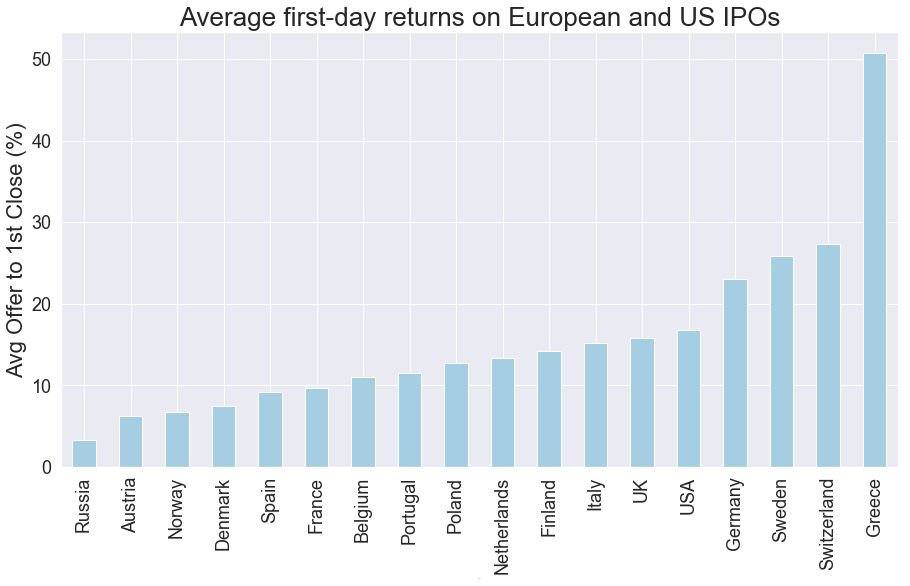

In [85]:
# Figure showing avg first day returns on european and us IPOs
country = pd.read_excel('IPO_Country.xlsx')
country.set_index('Country', inplace = True, )
countrytable = pd.DataFrame()
countrytable['Avg Initial return'] = country['Avg Initial return']*100

Countryfigure = countrytable.plot(kind='bar', legend=False, colormap='Paired', 
                                figsize=(15,8), fontsize=18, style= 'seaborn',)
Countryfigure.set_xlabel("Country", fontsize=0)
Countryfigure.set_ylabel("Avg Offer to 1st Close (%)", fontsize=22)
Countryfigure.set_title('Average first-day returns on European and US IPOs', fontsize=26)

In [86]:
# T-test 
# Hypothesis 2: No sign. difference between tech and non-tech ipos
Nontech1 = pd.DataFrame(index=ipo.index)
Tech1 = pd.DataFrame(index=ipo.index)
Tech2 = pd.DataFrame(index=ipo.index)
Nontech2 = pd.DataFrame(index=ipo.index)
logunderprice = pd.DataFrame()
logunderprice['logret'] = np.log(1 + (winzipo['0.5% winz']/100))
Nontech1['Nontech'] = np.where(technum==5,0,1)
Nontech2['Nontech ret'] = np.multiply(Nontech1,logunderprice)
#Nontech2.reset_index(inplace= True)
Tech1['Tech'] = np.where(technum==5,1,0)
Tech2['Tech ret'] = np.multiply(Tech1,logunderprice)
#Tech2.reset_index(inplace= True)

#Remove observations where ret = 0 to get more accurate means
nozeroNon = pd.DataFrame()
nozeroTech = pd.DataFrame()
nozeromean_nontech = Nontech2[Nontech2['Nontech ret']!=0].mean()
nozeroNon['Nontech ret'] = np.where(Nontech2['Nontech ret'] == 0, nozeromean_nontech, Nontech2['Nontech ret'])
nozeromean_Tech = Tech2[Tech2['Tech ret'] != 0].mean()
nozeroTech['Tech ret'] = np.where(Tech2['Tech ret']==0, nozeromean_Tech, Tech2['Tech ret'])

#Levenes test of variances
stats.levene(nozeroNon['Nontech ret'], nozeroTech['Tech ret']) # Low pval, no homo, hence 
# We need to conduct a Welchs t-test.

#Normality tests
#diff = nozeroTech['Tech ret'] -nozeroNon['Nontech ret']
#stats.shapiro(nozeroNon['Nontech ret'])
#stats.shapiro(nozeroTech['Tech ret'])
#stats.shapiro(diff) # Significant pval

#Welch's t-test
stats.ttest_ind(nozeroNon['Nontech ret'],nozeroTech['Tech ret'], equal_var = False) # Significant pval 
# There is a difference between tech returns and non tech ret.

Ttest_indResult(statistic=-3.826184412545567, pvalue=0.00014356572310858867)

In [87]:
# T-test of hypothesis 3: Young vs Old companies
Young1 = pd.DataFrame(index=ipo.index)
Young2 = pd.DataFrame(index=ipo.index)
Old1 = pd.DataFrame(index=ipo.index)
Old2 = pd.DataFrame(index=ipo.index)
Young1['Young Dummy'] =  np.where(ipo['Age']<7, 1,0)
Old1['Old Dummy'] =  np.where(ipo['Age']>7, 1,0)
Young2['Young Ret'] = np.multiply(Young1['Young Dummy'],logunderprice['logret'])
Old2['Old Ret'] = np.multiply(Old1['Old Dummy'],logunderprice['logret'])

#Remove observations with zeros
nozeroYoung = pd.DataFrame()
nozeroOld = pd.DataFrame()
nonzero_mean1 = Young2[Young2['Young Ret']!=0].mean()
nozeroYoung['Young Ret'] = np.where(Young2['Young Ret'] == 0, nonzero_mean1, Young2['Young Ret'])
nonzero_mean2 = Old2[Old2['Old Ret']!=0].mean()
nozeroOld['Old Ret'] = np.where(Old2['Old Ret'] == 0, nonzero_mean2, Old2['Old Ret'])


#Levenes test of variances
stats.levene(nozeroYoung['Young Ret'], nozeroOld['Old Ret']) # pvalue = 0.30, there is homo

#Normality tests
diff2 = nozeroYoung['Young Ret'] -nozeroOld['Old Ret']
#diff2.plot(kind='hist')
#sm.qqplot(diff2)
stats.shapiro(diff2) # Significant p-val, hence there is a significant difference
# in means between old and new companies

#Indep. T-test
#stats.ttest_ind(nozeroYoung['Young Ret'],nozeroOld['Old Ret']) # Not significant

(0.912042498588562, 1.3409329883588362e-15)